In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

object
[180, 1620, 3060, 4500, 5940, 7380, 8820, 10260, 11700, 13140, 14580, 16020, 17460, 18900, 20340, 21780, 23220, 24660, 26100, 27540]
activity
0       383
372      40
483      25
687      22
756      21
       ... 
34        1
3009      1
41        1
40        1
2205      1
Name: count, Length: 142, dtype: int64
13


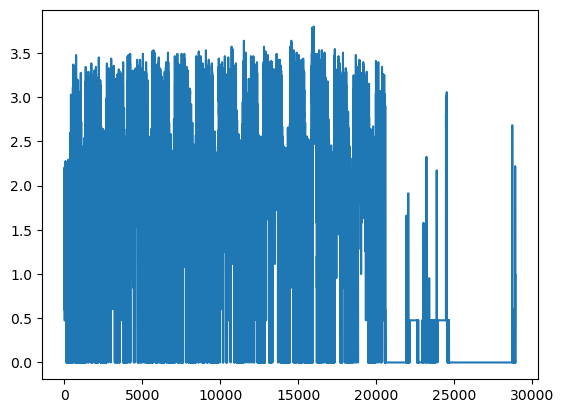

In [83]:
def log10_skip_zeroes(x):
    if x == 0:
        return 0
    return math.log10(x)

dir_path = "data/all"
folders = ['condition', 'control']
scores = pd.read_csv("data/scores.csv", index_col='number')


data_path = os.path.join(dir_path, folders[1], "control_8.csv")
df = pd.read_csv(data_path)
print(df['timestamp'].dtype)
sr = df['timestamp'].map(lambda x: x.split()[1])
indexes_of_time = list(sr[sr=="12:00:00"].index)

num_days = scores.loc["control_8", "days"]
days = []
for i in range(num_days):
    interval = [indexes_of_time[i], indexes_of_time[i+1]]
    days.append(df.iloc[interval[0]:interval[1]])

print(indexes_of_time)
print(days[12]['activity'].value_counts())
print(len(days))

sr = df['activity']
sr = sr.map(lambda x : log10_skip_zeroes(x))
ts = torch.from_numpy(sr.to_numpy()).float()
plt.plot(ts)

In [ ]:
CONDITION_SIZE = 23
CONTROL_SIZE = 32
DIR_PATH = "data/all"
scores = pd.read_csv("data/scores.csv", index_col='number')

def load_data(dir_name: str, 
              dir_size: int, 
              class_type: str,  
              class_label: int,
              start_time: str,
              output_df: pd.DataFrame, 
              scores_df: pd.DataFrame):
    for i in range(1, dir_size + 1):
        
        # read CSV into truncated dataframe
        
        filename = f"{class_type}_{i}"
        datapath = os.path.join(dir_name, filename + ".csv")
        file_df = pd.read_csv(datapath)

        # find occurences of 

        sr = file_df['timestamp'].map(lambda x: x.split()[1])
        indexes_of_time = list(sr[sr==start_time].index)

        # split file_df into intervals of days

        num_days = scores_df.loc[filename, "days"]
        for j in range(num_days):
            interval = [indexes_of_time[j], indexes_of_time[j+1]]
            day_df = file_df.iloc[interval[0]:interval[1]]
            day_df = day_df['activity'].rename(f"{class_label}_{i}_{j}").reset_index(drop=True)
            # concatenate data column to output dataframe
            
            output_df = pd.concat([output_df, day_df], axis=1)

    return output_df

actigraph_data = pd.DataFrame()
actigraph_data = load_data("data/all/control", 32, "control", 0, "12:00:00", actigraph_data, scores)
actigraph_data = load_data("data/all/condition", 23, "condition", 1, "12:00:00", actigraph_data, scores)

actigraph_data = actigraph_data.map(lambda x: log10_skip_zeroes(x))
actigraph_data = actigraph_data.transpose()

actigraph_labels = actigraph_data.index.map(lambda x: int(x[0]))
X_train, X_test, y_train, y_test = train_test_split(actigraph_data, actigraph_labels, test_size=0.4, 
                                                    shuffle=True, random_state=42)

scaler = MinMaxScaler((0,1))
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

X_train, y_train

class ActigraphDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.from_numpy(X).float()
        self.y = torch.tensor(y).long()
    def __len__(self):
        return len(self.y)
    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        
        # code for reshaping 1d tensor to 2d with padding
        '''
        new_shape = math.ceil(X.shape[0] / INPUT_SIZE)
        padding = new_shape * INPUT_SIZE - X.shape[0]
        p = nn.ZeroPad1d((0,padding))
        X = p(X)
        X = X.reshape((new_shape, INPUT_SIZE))
        '''
        return X, y

train_dataset = ActigraphDataset(X_train.to_numpy(), y_train)
test_dataset = ActigraphDataset(X_test.to_numpy(), y_test)

train_dataloader = DataLoader(train_dataset, 8, shuffle=True)
test_dataloader = DataLoader(test_dataset, 8, shuffle=True)

1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1380
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1380
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440
1440


In [45]:
INPUT_DIM = 1
OUTPUT_DIM = 1
HIDDEN_DIM = 8

class ConvNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv1d(input_dim, hidden_dim, kernel_size=3, padding = 1),
            nn.LeakyReLU(),
            nn.Conv1d(hidden_dim, hidden_dim, kernel_size=3, padding = 1),
            nn.LeakyReLU(),
            nn.MaxPool1d(2)
        )
        self.linear = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.linear(x)
        return x

model_0 = ConvNN(INPUT_DIM, OUTPUT_DIM, HIDDEN_DIM).to(device)
model_0.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[ 0.3592, -0.5330, -0.3034]],
              
                      [[ 0.1981,  0.1377,  0.1626]],
              
                      [[-0.5413, -0.0788, -0.0902]],
              
                      [[-0.0398, -0.0898, -0.3105]],
              
                      [[-0.2850, -0.0034,  0.4091]],
              
                      [[-0.1168, -0.0555,  0.4568]],
              
                      [[ 0.0123, -0.1763,  0.1449]],
              
                      [[-0.0057, -0.3065,  0.2899]]], device='cuda:0')),
             ('conv_block_1.0.bias',
              tensor([ 0.4731,  0.0245,  0.0908, -0.5226, -0.4776,  0.4894,  0.5458, -0.1444],
                     device='cuda:0')),
             ('conv_block_1.2.weight',
              tensor([[[ 1.6167e-01,  4.8713e-02, -1.0619e-01],
                       [-1.3927e-01,  1.4356e-01, -3.6964e-02],
                       [ 1.4553e-01,  2.1997e-02, -6.3601e-02],
         